<a href="https://colab.research.google.com/github/murali-marimekala/pg-genai-ml/blob/main/Wk3_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Day 2 Session


## Reading CSV files using panadas

In [2]:
import pandas as pd
df = pd.read_csv('/content/sample_data/mnist_test.csv', nrows=5)
# Select the first 10 columns for display
display(df.iloc[:, :10])

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
0,2,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


## Creating excel file using pandas, adding data and reaidng back

In [3]:
output_excel_path = '/content/sample_data/mnist_test.xlsx'
df.to_excel(output_excel_path, index=False)
df_excel = pd.read_excel(output_excel_path)
print('DataFrame successfully written to and read from Excel file:')
print(df_excel.head())

DataFrame successfully written to and read from Excel file:
   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [8]:
data  = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
}

df = pd.DataFrame(data)
print(df)

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35


In [9]:
# Access a single column
name_column = df['Name']
print(name_column)

0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object


In [13]:
df['Age'] = df['Age'].replace(25,26) # Replace individual values with new values
print(df)

      Name  Age
0    Alice   26
1      Bob   30
2  Charlie   35


In [16]:
df['Age'] = df['Age'].apply(lambda x: x + 1)
print(df)

      Name  Age
0    Alice   27
1      Bob   31
2  Charlie   36


In [27]:
# Accessing specific rows and columns
# Access rows 'a' and 'b' and columns 'Name' and 'Age'
df = pd.DataFrame(data, index=['a','b','c'])
subset = df.loc[['a','b'],['Name','Age']]
print(subset)

    Name  Age
a  Alice   25
b    Bob   30


In [23]:
data2 = {
    'Name': ['Alice', 'Bob', 'Charle'],
    'Gender': ['M', 'F', 'M']
}
df1 = pd.DataFrame(data2)
print(df1)

     Name Gender
0   Alice      M
1     Bob      F
2  Charle      M


In [24]:
df['Gender']=df1['Gender']
print(df)

      Name  Age Gender
0    Alice   27      M
1      Bob   31      F
2  Charlie   36      M


## Combining two dataframes


In [28]:
# SQL like joins are possible in DataFrames

df1 = pd.DataFrame({
    'key': ['A', 'B', 'C', 'D'],
    'value1': [1, 2, 3, 4]  # Add more columns as needed
})

df2 = pd.DataFrame({
    'key': ['B', 'D', 'E', 'F'],
    'value2': [5, 6, 7,7 ]
})

merged = pd.merge(df1, df2, on='key', how='inner')
print(merged)

  key  value1  value2
0   B       2       5
1   D       4       6


In [31]:
# Use CONCAT to combine DataFrames vertically or horizontally
pd.concat([df1,df2]) # Rowwise append

,key,value1,value2
0,A,1.0,NaN
1,B,2.0,NaN
2,C,3.0,NaN
3,D,4.0,NaN
0,B,NaN,5.0
1,D,NaN,6.0
2,E,NaN,7.0
3,F,NaN,7.0


In [34]:
pd.concat([df1,df2], axis=1)

,key,value1,key,value2
0,A,1,B,5
1,B,2,D,6
2,C,3,E,7
3,D,4,F,7


## Filtering Data

In [39]:
filt = df1[df1['value1'] > 2]
print(filt)

  key  value1
2   C       3
3   D       4


## Sorting data

In [45]:
df1.sort_values(by=['value1'], ascending=[False]) # Default sorting is in the ascending order

,key,value1
3,D,4
2,C,3
1,B,2
0,A,1


## Group data

In [55]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob', 'Charlie'],
    'Value': [10, 20, 30, 40, 50, 60]
}

df1 = pd.DataFrame(data)
print(df1)
df1.groupby('Name')['Value'].sum()

      Name  Value
0    Alice     10
1      Bob     20
2  Charlie     30
3    Alice     40
4      Bob     50
5  Charlie     60


,Value
Name,
Alice,50
Bob,70
Charlie,90


# Mean of the values

In [56]:
df1.groupby('Name')['Value'].mean()

,Value
Name,
Alice,25.0
Bob,35.0
Charlie,45.0


## Handling Missing values

In [60]:
import numpy as np
data = {
    'Name' : ['Alice', 'Bob', 'Charlie', 'David'],
    'Age' : ['30','40', '50', np.nan] # Added np.nan to make lengths equal and simulate a missing value
}

df = pd.DataFrame(data)
# Convert 'Age' column to numeric type, coercing errors will turn non-numeric values to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Fill missing values with the mean of the 'Age' column
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df)

      Name   Age
0    Alice  30.0
1      Bob  40.0
2  Charlie  50.0
3    David  40.0


In [64]:
df.to_csv('data.csv', index=False)
data = pd.read_csv('data.csv')
print(data)


      Name   Age
0    Alice  30.0
1      Bob  40.0
2  Charlie  50.0
3    David  40.0


# Visualization library - Matplotlib

-Widely used for exploratory data anlaysis


## Line Plot

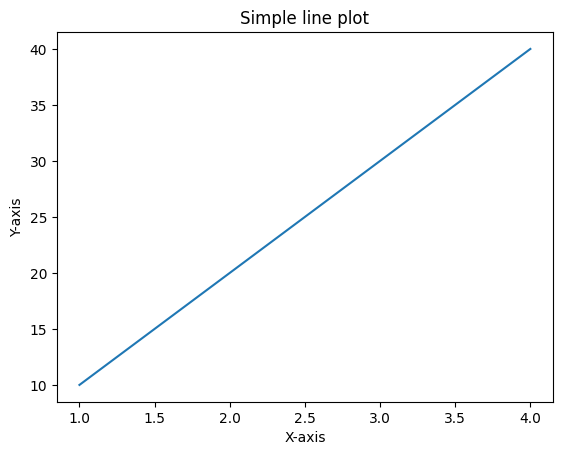

In [70]:
import matplotlib.pyplot as plt

x = [1,2,3,4]
y = [10,20,30,40]
plt.plot(x,y)
plt.title("Simple line plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# Barchart Plot

- Used to show data categorically

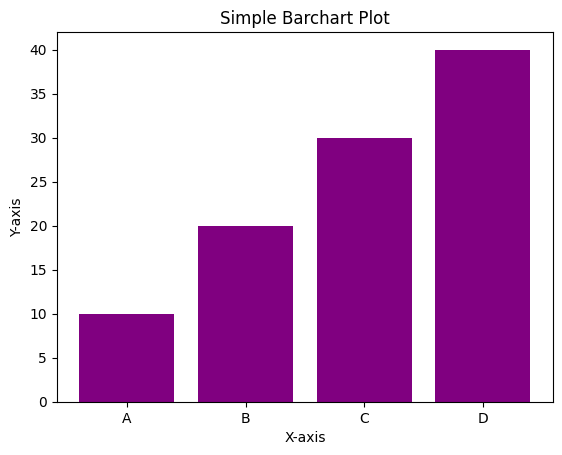

In [74]:
# Barchart Plot
import matplotlib.pyplot as plt
import numpy as np

x = ['A', 'B', 'C', 'D']
y = [10,20,30,40]
plt.bar(x,y,color = "purple")
plt.title("Simple Barchart Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

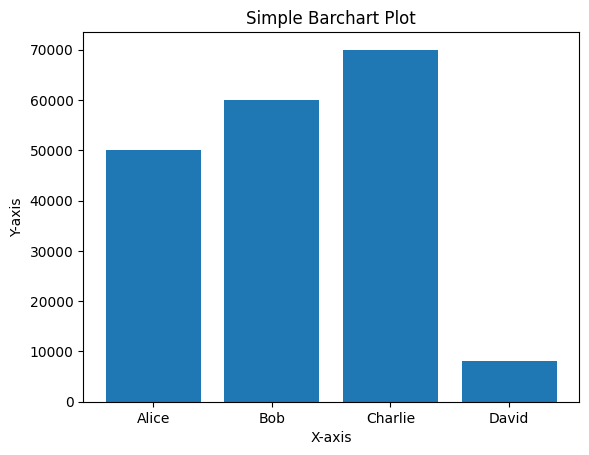

In [83]:
# Giving fixed Y axis range
employee = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Salary': [50000, 60000, 70000, 8000]
}

plt.bar(employee['Name'], employee['Salary'])
plt.title("Simple Barchart Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.ylim(0,100000) #Instead of higher y value 70000 we use 100000
plt.show()

## Scatter plot

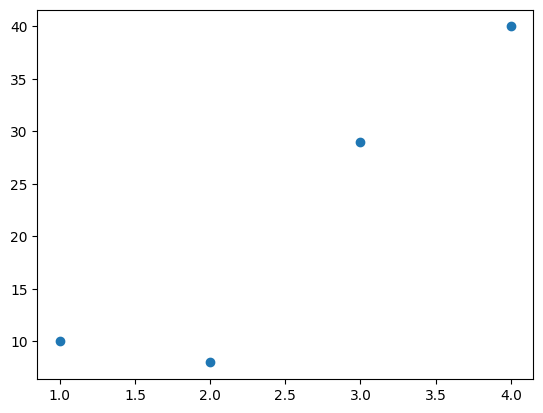

In [85]:
x = [1,2,3,4]
y = [10,8,29,40]
plt.scatter(x,y)

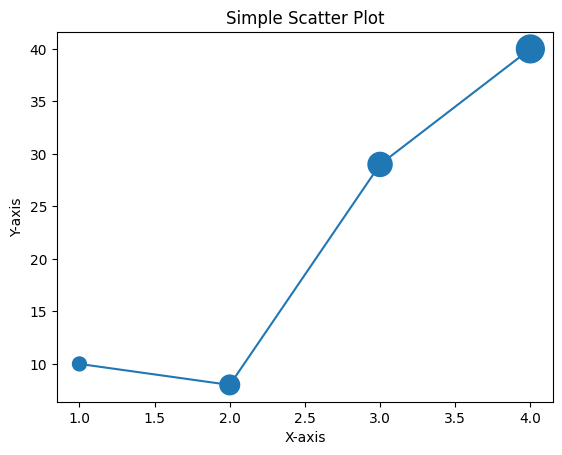

In [89]:
# Showing multiple series in single scatter plot
x = [1,2,3,4]
y = [10,8,29,40]
z = [100,200,300,400]
plt.scatter(x, y, z)

# Adding a line in scatter plot
plt.plot(x,y)

plt.title("Simple Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

## Pie Chart

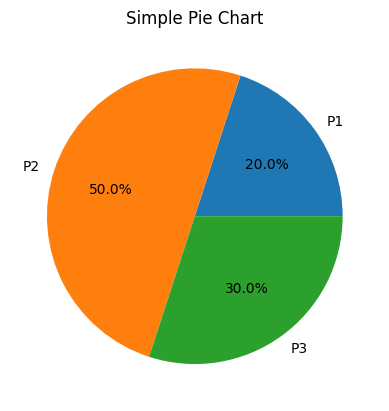

In [91]:
Product = ['P1','P2','P3']
Marks = [80,200,120]

plt.pie(Marks, labels=Product, autopct='%1.1f%%')
plt.title("Simple Pie Chart")
plt.show()


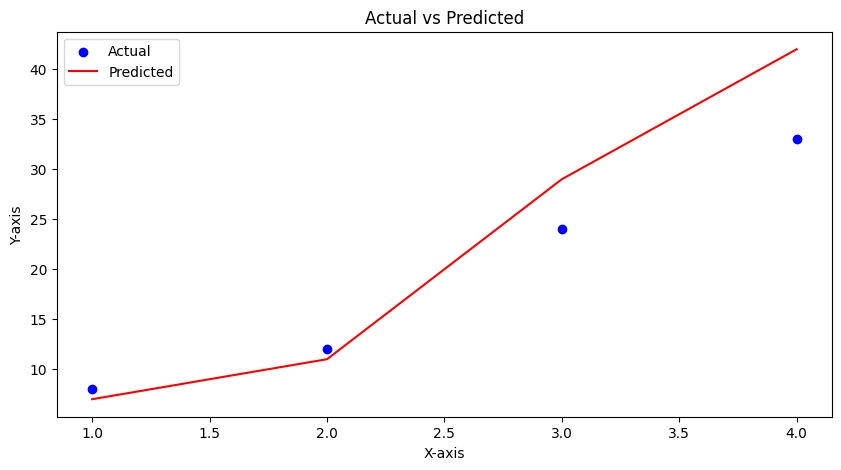

In [98]:
# Showing multiple series in a single plot

import matplotlib.pyplot as plt
import numpy as np

#example data
x = np.array([1,2,3,4])
y_actual = np.array([8,12,24,33])
y_predicted = np.array([7,11,29,42])

plt.figure(figsize=(10,5))
plt.scatter(x, y_actual, label='Actual',color='b')
plt.plot(x, y_predicted, label='Predicted',color='r')

plt.title("Actual vs Predicted")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()



In [100]:
# Example with Dataset

import pandas as pd
import numpy as np

#Create car sales data
car_data = {
    'Brand': ['Toyota', 'Honda', 'Ford', 'BMW', 'Mercedes'],
    'Model': ['Camry', 'Civic', 'Fusion', 'X5', 'C-Class'],
    'Year': [2020, 2021, 2019, 2022, 2023],
    'Sales': [150000, 120000, 80000, 50000, 60000]
}
car = pd.DataFrame(car_data)
print(car)

      Brand    Model  Year   Sales
0    Toyota    Camry  2020  150000
1     Honda    Civic  2021  120000
2      Ford   Fusion  2019   80000
3       BMW       X5  2022   50000
4  Mercedes  C-Class  2023   60000


In [101]:
avg_price = car.groupby('Brand')['Sales'].mean()
print(avg_price)

Brand
BMW          50000.0
Ford         80000.0
Honda       120000.0
Mercedes     60000.0
Toyota      150000.0
Name: Sales, dtype: float64


In [102]:
avg_price = avg_price.sort_values(ascending=False)
print(avg_price)

Brand
Toyota      150000.0
Honda       120000.0
Ford         80000.0
Mercedes     60000.0
BMW          50000.0
Name: Sales, dtype: float64


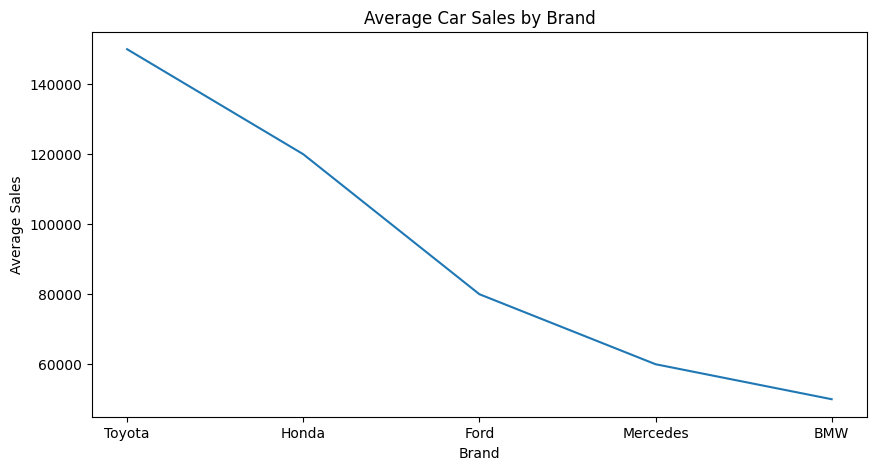

In [111]:
plt.figure(figsize=(10,5))
plt.plot(avg_price.index, avg_price.values)
plt.title("Average Car Sales by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Sales")
plt.show()

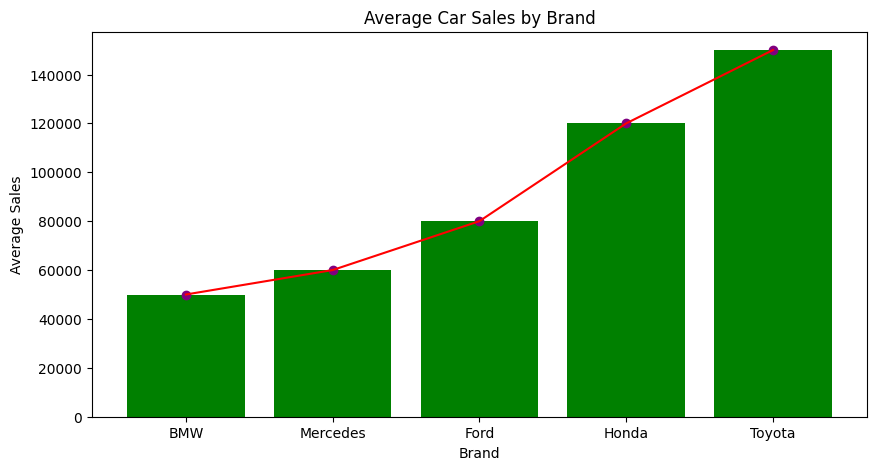

In [118]:
avg_price = car.groupby('Brand')['Sales'].mean()
avg_price = avg_price.sort_values(ascending=True)
plt.figure(figsize=(10,5))
plt.bar(avg_price.index, avg_price.values,color='green')
plt.scatter(avg_price.index, avg_price.values,color='purple')
plt.plot(avg_price.index, avg_price.values,color='r')
plt.title("Average Car Sales by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Sales")
plt.show()

# Python - Seaborn library

- Built on top of Matplotlib
- High lvel python library for data visualization
- Produces visually appealing and informative statistical graphcs
- Helps in quick data exploration with minimal code (Automatic color and styles)
- Much quicker than matplotlib
- Its similar to matplotlib with advanced features

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
# create a dataset on tips restaurant visit which has total_bill,  tip, sex, smoker, day, time, size columns
tips = sns.load_dataset('tips')
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


# Plot using Matploat vs Seaborn

/tmp/ipython-input-2977554590.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = tips.groupby('day')['total_bill'].mean()


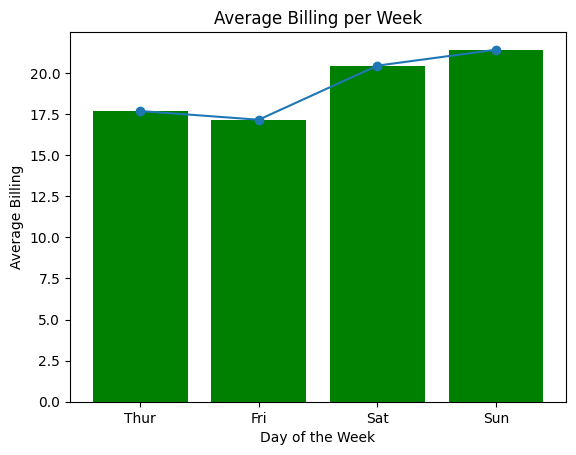

In [126]:
# Analyze if the average billing per day using both matplotlib vs Seaborn

# Using matplotlib

# Group it by day and total bill average
grouped = tips.groupby('day')['total_bill'].mean()
plt.bar(grouped.index, grouped.values,color='green')
plt.scatter(grouped.index, grouped.values)
plt.plot(grouped.index, grouped.values)
plt.title('Average Billing per Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Billing')
plt.show()

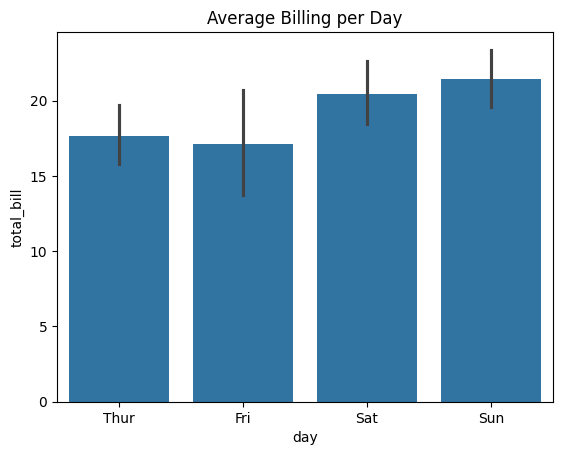

In [129]:
# Using seaborn
sns.barplot(x='day', y='total_bill', data=tips) # No where we are giving to calculate the average. Its a default aggregation in seaborn
plt.title('Average Billing per Day')
plt.show()


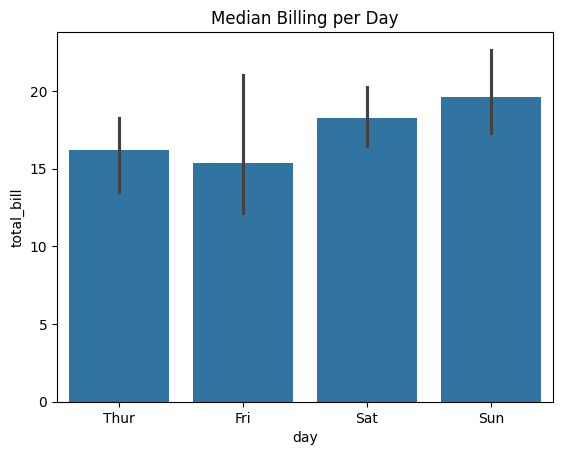

In [130]:
# Using seaborn but changing the aggregation for calculating total bill for each day
import numpy as np

sns.barplot(x="day", y="total_bill", data=tips, estimator=np.median)
plt.title("Median Billing per Day")
plt.show()

/tmp/ipython-input-4037223196.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = tips.groupby(['time', 'sex'])['total_bill'].mean().unstack()


sex          Male     Female
time                        
Lunch   18.048485  16.339143
Dinner  21.461452  19.213077


Text(0, 0.5, 'Average Billing')

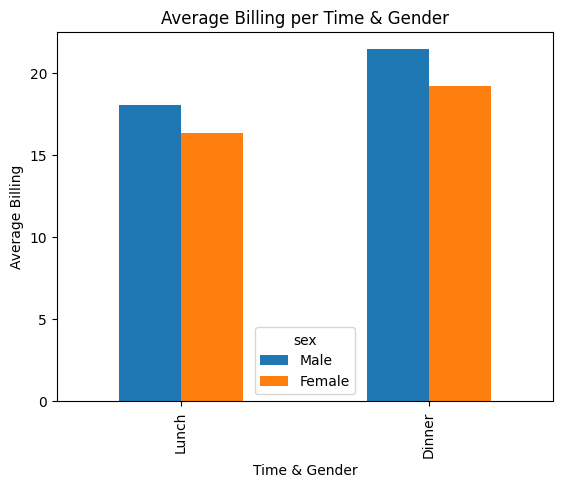

In [138]:
# Another example of Seaborn

# Total bill by the Time & Gender

#Using matplotlib
grouped = tips.groupby(['time', 'sex'])['total_bill'].mean().unstack()
grouped.plot(kind="bar")
grouped
print(grouped)
plt.title('Average Billing per Time & Gender')
plt.xlabel('Time & Gender')
plt.ylabel('Average Billing')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

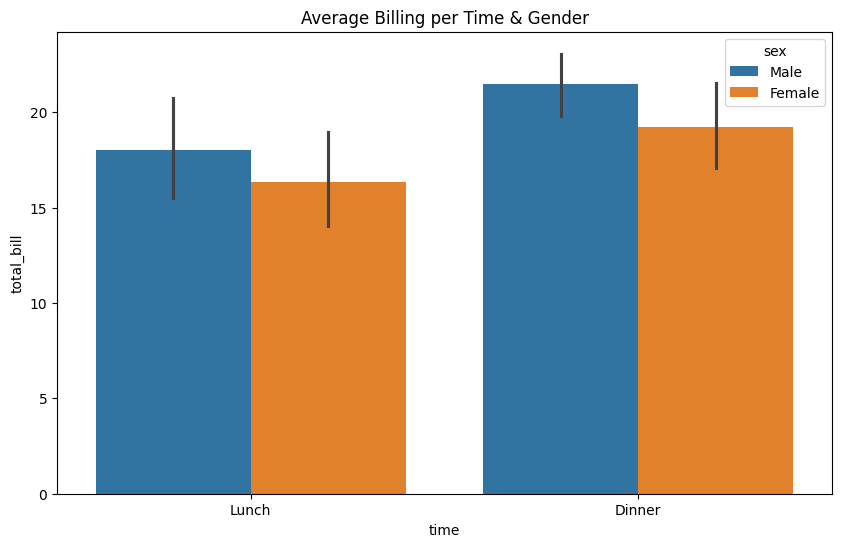

In [135]:
# Using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='time', y='total_bill', hue='sex', data=tips)
plt.title('Average Billing per Time & Gender')
plt